## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [1]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('german.csv', sep=';')

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

data.head()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


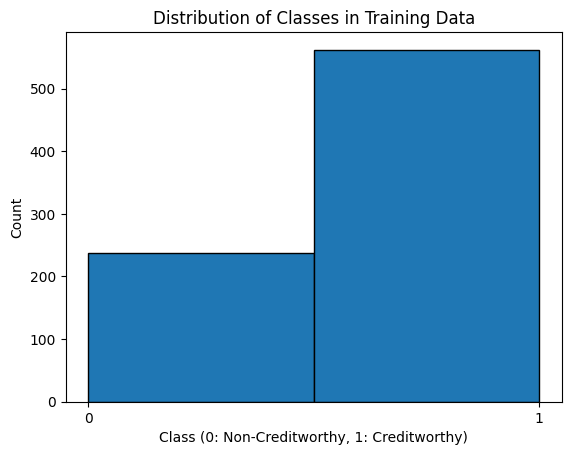

In [3]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [4]:
# Обучение Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Прогноз на тестовых данных
rf_pred = rf_model.predict(X_test)

# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Прогноз на тестовых данных
gb_pred = gb_model.predict(X_test)

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")

Random Forest метрики:
ROC AUC: 0.68
Accuracy: 0.76
Precision: 0.78
Recall: 0.90

Gradient Boosting метрики:
ROC AUC: 0.67
Accuracy: 0.73
Precision: 0.79
Recall: 0.84


In [5]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
mlp_model = MLPClassifier(hidden_layer_sizes=(30,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Прогноз на тестовых данных
mlp_pred = mlp_model.predict(X_test)

# Расчет метрик для MLP нейронной сети
mlp_roc_auc = roc_auc_score(y_test, mlp_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")


MLP (Neural Network) метрики:
ROC AUC: 0.56
Accuracy: 0.65
Precision: 0.72
Recall: 0.79


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### Random Forest

In [12]:
model_forest = RandomForestClassifier()

In [13]:
model_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [268]:
params_forest = {
    'max_depth': [10, 50, 100, None],
    'n_estimators': [100, 250, 500],
}

In [269]:
grid = GridSearchCV(model_forest, param_grid=params_forest, cv=2, verbose=10)

In [270]:
grid.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV 1/2; 1/12] START max_depth=10, n_estimators=100.............................
[CV 1/2; 1/12] END max_depth=10, n_estimators=100;, score=0.748 total time=   0.0s
[CV 2/2; 1/12] START max_depth=10, n_estimators=100.............................
[CV 2/2; 1/12] END max_depth=10, n_estimators=100;, score=0.743 total time=   0.0s
[CV 1/2; 2/12] START max_depth=10, n_estimators=250.............................
[CV 1/2; 2/12] END max_depth=10, n_estimators=250;, score=0.765 total time=   0.2s
[CV 2/2; 2/12] START max_depth=10, n_estimators=250.............................
[CV 2/2; 2/12] END max_depth=10, n_estimators=250;, score=0.757 total time=   0.2s
[CV 1/2; 3/12] START max_depth=10, n_estimators=500.............................
[CV 1/2; 3/12] END max_depth=10, n_estimators=500;, score=0.772 total time=   0.4s
[CV 2/2; 3/12] START max_depth=10, n_estimators=500.............................
[CV 2/2; 3/12] END max_depth=10, n_est

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 50, 100, None],
                         'n_estimators': [100, 250, 500]},
             verbose=10)

In [273]:
roc_auc_score(y_test, grid.predict_proba(X_test)[:, 1]).round(3)

0.778

In [258]:
grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'n_estimators': 100}

### Gradient Boosting

In [87]:
pipe_grad = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingClassifier())
])

In [88]:
pipe_grad.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('model', GradientBoostingClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': GradientBoostingClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'friedman_mse',
 'model__init': None,
 'model__learning_rate': 0.1,
 'model__loss': 'log_loss',
 'model__max_depth': 3,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_iter_no_change': None,
 'model__random_state': None,
 'model__subsample': 1.0,
 'model__tol': 0.0001,
 'model__validation_fraction': 0.1,
 'model__verbose': 0,
 'model__warm_start': False}

In [92]:
params_grad = {
    'model__learning_rate': [1e-2, 1e-1],
    'model__n_estimators': [50, 100, 300, 500],
    'model__max_depth': [1, 3, 5, 10, 50]
}

In [93]:
grid_grad = GridSearchCV(pipe_grad, params_grad, verbose=10, cv=2)

In [94]:
grid_grad.fit(X_train, y_train)

Fitting 2 folds for each of 60 candidates, totalling 120 fits
[CV 1/2; 1/60] START model__learning_rate=0.001, model__max_depth=1, model__n_estimators=50
[CV 1/2; 1/60] END model__learning_rate=0.001, model__max_depth=1, model__n_estimators=50;, score=0.703 total time=   0.0s
[CV 2/2; 1/60] START model__learning_rate=0.001, model__max_depth=1, model__n_estimators=50
[CV 2/2; 1/60] END model__learning_rate=0.001, model__max_depth=1, model__n_estimators=50;, score=0.703 total time=   0.0s
[CV 1/2; 2/60] START model__learning_rate=0.001, model__max_depth=1, model__n_estimators=100
[CV 1/2; 2/60] END model__learning_rate=0.001, model__max_depth=1, model__n_estimators=100;, score=0.703 total time=   0.0s
[CV 2/2; 2/60] START model__learning_rate=0.001, model__max_depth=1, model__n_estimators=100
[CV 2/2; 2/60] END model__learning_rate=0.001, model__max_depth=1, model__n_estimators=100;, score=0.703 total time=   0.0s
[CV 1/2; 3/60] START model__learning_rate=0.001, model__max_depth=1, model

[CV 2/2; 19/60] END model__learning_rate=0.001, model__max_depth=50, model__n_estimators=300;, score=0.703 total time=   0.8s
[CV 1/2; 20/60] START model__learning_rate=0.001, model__max_depth=50, model__n_estimators=500
[CV 1/2; 20/60] END model__learning_rate=0.001, model__max_depth=50, model__n_estimators=500;, score=0.715 total time=   1.4s
[CV 2/2; 20/60] START model__learning_rate=0.001, model__max_depth=50, model__n_estimators=500
[CV 2/2; 20/60] END model__learning_rate=0.001, model__max_depth=50, model__n_estimators=500;, score=0.748 total time=   1.4s
[CV 1/2; 21/60] START model__learning_rate=0.01, model__max_depth=1, model__n_estimators=50
[CV 1/2; 21/60] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=50;, score=0.703 total time=   0.0s
[CV 2/2; 21/60] START model__learning_rate=0.01, model__max_depth=1, model__n_estimators=50
[CV 2/2; 21/60] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=50;, score=0.703 total time=   0.0s
[C

[CV 2/2; 38/60] END model__learning_rate=0.01, model__max_depth=50, model__n_estimators=100;, score=0.735 total time=   0.2s
[CV 1/2; 39/60] START model__learning_rate=0.01, model__max_depth=50, model__n_estimators=300
[CV 1/2; 39/60] END model__learning_rate=0.01, model__max_depth=50, model__n_estimators=300;, score=0.685 total time=   0.8s
[CV 2/2; 39/60] START model__learning_rate=0.01, model__max_depth=50, model__n_estimators=300
[CV 2/2; 39/60] END model__learning_rate=0.01, model__max_depth=50, model__n_estimators=300;, score=0.730 total time=   0.8s
[CV 1/2; 40/60] START model__learning_rate=0.01, model__max_depth=50, model__n_estimators=500
[CV 1/2; 40/60] END model__learning_rate=0.01, model__max_depth=50, model__n_estimators=500;, score=0.685 total time=   1.4s
[CV 2/2; 40/60] START model__learning_rate=0.01, model__max_depth=50, model__n_estimators=500
[CV 2/2; 40/60] END model__learning_rate=0.01, model__max_depth=50, model__n_estimators=500;, score=0.735 total time=   1.4s

[CV 1/2; 58/60] END model__learning_rate=0.1, model__max_depth=50, model__n_estimators=100;, score=0.677 total time=   0.2s
[CV 2/2; 58/60] START model__learning_rate=0.1, model__max_depth=50, model__n_estimators=100
[CV 2/2; 58/60] END model__learning_rate=0.1, model__max_depth=50, model__n_estimators=100;, score=0.740 total time=   0.2s
[CV 1/2; 59/60] START model__learning_rate=0.1, model__max_depth=50, model__n_estimators=300
[CV 1/2; 59/60] END model__learning_rate=0.1, model__max_depth=50, model__n_estimators=300;, score=0.688 total time=   0.4s
[CV 2/2; 59/60] START model__learning_rate=0.1, model__max_depth=50, model__n_estimators=300
[CV 2/2; 59/60] END model__learning_rate=0.1, model__max_depth=50, model__n_estimators=300;, score=0.725 total time=   0.4s
[CV 1/2; 60/60] START model__learning_rate=0.1, model__max_depth=50, model__n_estimators=500
[CV 1/2; 60/60] END model__learning_rate=0.1, model__max_depth=50, model__n_estimators=500;, score=0.677 total time=   0.5s
[CV 2/2;

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        GradientBoostingClassifier())]),
             param_grid={'model__learning_rate': [0.001, 0.01, 0.1],
                         'model__max_depth': [1, 3, 5, 10, 50],
                         'model__n_estimators': [50, 100, 300, 500]},
             verbose=10)

In [96]:
grid_grad.best_params_

{'model__learning_rate': 0.01,
 'model__max_depth': 5,
 'model__n_estimators': 300}

In [95]:
roc_auc_score(y_test, grid_grad.predict_proba(X_test)[:, 1]).round(3)

0.75

### MLP

In [99]:
pipe_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('model', MLPClassifier())
])

In [100]:
pipe_mlp.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('model', MLPClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': MLPClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__activation': 'relu',
 'model__alpha': 0.0001,
 'model__batch_size': 'auto',
 'model__beta_1': 0.9,
 'model__beta_2': 0.999,
 'model__early_stopping': False,
 'model__epsilon': 1e-08,
 'model__hidden_layer_sizes': (100,),
 'model__learning_rate': 'constant',
 'model__learning_rate_init': 0.001,
 'model__max_fun': 15000,
 'model__max_iter': 200,
 'model__momentum': 0.9,
 'model__n_iter_no_change': 10,
 'model__nesterovs_momentum': True,
 'model__power_t': 0.5,
 'model__random_state': None,
 'model__shuffle': True,
 'model__solver': 'adam',
 'model__tol': 0.0001,
 'model__validation_fraction': 0.1,
 'model__verbose': False,
 'model__warm_start': False}

In [244]:
params_mlp = {
    'model__hidden_layer_sizes': [(50, ), (500, )],
    'model__alpha': [1e-7, 1e-6],
    'model__learning_rate_init': [5e-3,1e-4, 5e-2],
    'model__max_iter': [100, 200, 300],
}

In [245]:
grid_mlp = GridSearchCV(pipe_mlp, params_mlp, verbose=10, cv=2)

In [246]:
grid_mlp.fit(X_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
[CV 1/2; 1/36] START model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.005, model__max_iter=100
[CV 1/2; 1/36] END model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.005, model__max_iter=100;, score=0.748 total time=   0.0s
[CV 2/2; 1/36] START model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.005, model__max_iter=100


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2; 1/36] END model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.005, model__max_iter=100;, score=0.728 total time=   0.0s
[CV 1/2; 2/36] START model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.005, model__max_iter=200


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2; 2/36] END model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.005, model__max_iter=200;, score=0.738 total time=   0.1s
[CV 2/2; 2/36] START model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.005, model__max_iter=200


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2; 2/36] END model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.005, model__max_iter=200;, score=0.728 total time=   0.1s
[CV 1/2; 3/36] START model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.005, model__max_iter=300


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2; 3/36] END model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.005, model__max_iter=300;, score=0.715 total time=   0.3s
[CV 2/2; 3/36] START model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.005, model__max_iter=300


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2; 3/36] END model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.005, model__max_iter=300;, score=0.705 total time=   0.3s
[CV 1/2; 4/36] START model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.0001, model__max_iter=100
[CV 1/2; 4/36] END model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.0001, model__max_iter=100;, score=0.677 total time=   0.0s
[CV 2/2; 4/36] START model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.0001, model__max_iter=100


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2; 4/36] END model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.0001, model__max_iter=100;, score=0.675 total time=   0.0s
[CV 1/2; 5/36] START model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.0001, model__max_iter=200


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2; 5/36] END model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.0001, model__max_iter=200;, score=0.672 total time=   0.1s
[CV 2/2; 5/36] START model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.0001, model__max_iter=200


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2; 5/36] END model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.0001, model__max_iter=200;, score=0.740 total time=   0.1s
[CV 1/2; 6/36] START model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.0001, model__max_iter=300


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2; 6/36] END model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.0001, model__max_iter=300;, score=0.750 total time=   0.3s
[CV 2/2; 6/36] START model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.0001, model__max_iter=300


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2; 6/36] END model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.0001, model__max_iter=300;, score=0.723 total time=   0.3s
[CV 1/2; 7/36] START model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.05, model__max_iter=100
[CV 1/2; 7/36] END model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.05, model__max_iter=100;, score=0.730 total time=   0.0s
[CV 2/2; 7/36] START model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.05, model__max_iter=100


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2; 7/36] END model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.05, model__max_iter=100;, score=0.703 total time=   0.0s
[CV 1/2; 8/36] START model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.05, model__max_iter=200
[CV 1/2; 8/36] END model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.05, model__max_iter=200;, score=0.748 total time=   0.0s
[CV 2/2; 8/36] START model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.05, model__max_iter=200
[CV 2/2; 8/36] END model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.05, model__max_iter=200;, score=0.710 total time=   0.0s
[CV 1/2; 9/36] START model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.05, model__max_iter=300
[CV 1/2; 9/36] END model__alpha=1e-07, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.05, model__max_iter=300;, score=0.720 total time=  

C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2; 10/36] END model__alpha=1e-07, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.005, model__max_iter=100;, score=0.738 total time=   0.3s
[CV 2/2; 10/36] START model__alpha=1e-07, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.005, model__max_iter=100


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2; 10/36] END model__alpha=1e-07, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.005, model__max_iter=100;, score=0.718 total time=   0.3s
[CV 1/2; 11/36] START model__alpha=1e-07, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.005, model__max_iter=200
[CV 1/2; 11/36] END model__alpha=1e-07, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.005, model__max_iter=200;, score=0.735 total time=   0.5s
[CV 2/2; 11/36] START model__alpha=1e-07, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.005, model__max_iter=200
[CV 2/2; 11/36] END model__alpha=1e-07, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.005, model__max_iter=200;, score=0.710 total time=   0.6s
[CV 1/2; 12/36] START model__alpha=1e-07, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.005, model__max_iter=300
[CV 1/2; 12/36] END model__alpha=1e-07, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.005, model__max_iter=300;, scor

C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2; 13/36] END model__alpha=1e-07, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.0001, model__max_iter=100;, score=0.750 total time=   0.3s
[CV 2/2; 13/36] START model__alpha=1e-07, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.0001, model__max_iter=100


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2; 13/36] END model__alpha=1e-07, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.0001, model__max_iter=100;, score=0.752 total time=   0.3s
[CV 1/2; 14/36] START model__alpha=1e-07, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.0001, model__max_iter=200


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2; 14/36] END model__alpha=1e-07, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.0001, model__max_iter=200;, score=0.757 total time=   0.8s
[CV 2/2; 14/36] START model__alpha=1e-07, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.0001, model__max_iter=200


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2; 14/36] END model__alpha=1e-07, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.0001, model__max_iter=200;, score=0.760 total time=   0.7s
[CV 1/2; 15/36] START model__alpha=1e-07, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.0001, model__max_iter=300


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2; 15/36] END model__alpha=1e-07, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.0001, model__max_iter=300;, score=0.760 total time=   1.1s
[CV 2/2; 15/36] START model__alpha=1e-07, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.0001, model__max_iter=300


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2; 15/36] END model__alpha=1e-07, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.0001, model__max_iter=300;, score=0.748 total time=   1.1s
[CV 1/2; 16/36] START model__alpha=1e-07, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.05, model__max_iter=100
[CV 1/2; 16/36] END model__alpha=1e-07, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.05, model__max_iter=100;, score=0.725 total time=   0.1s
[CV 2/2; 16/36] START model__alpha=1e-07, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.05, model__max_iter=100
[CV 2/2; 16/36] END model__alpha=1e-07, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.05, model__max_iter=100;, score=0.693 total time=   0.2s
[CV 1/2; 17/36] START model__alpha=1e-07, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.05, model__max_iter=200
[CV 1/2; 17/36] END model__alpha=1e-07, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.05, model__max_iter=200;, score=0.7

C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2; 19/36] END model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.005, model__max_iter=100;, score=0.715 total time=   0.0s
[CV 1/2; 20/36] START model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.005, model__max_iter=200


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2; 20/36] END model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.005, model__max_iter=200;, score=0.738 total time=   0.1s
[CV 2/2; 20/36] START model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.005, model__max_iter=200


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2; 20/36] END model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.005, model__max_iter=200;, score=0.700 total time=   0.1s
[CV 1/2; 21/36] START model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.005, model__max_iter=300


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2; 21/36] END model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.005, model__max_iter=300;, score=0.755 total time=   0.3s
[CV 2/2; 21/36] START model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.005, model__max_iter=300


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2; 21/36] END model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.005, model__max_iter=300;, score=0.685 total time=   0.3s
[CV 1/2; 22/36] START model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.0001, model__max_iter=100
[CV 1/2; 22/36] END model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.0001, model__max_iter=100;, score=0.690 total time=   0.0s
[CV 2/2; 22/36] START model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.0001, model__max_iter=100


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2; 22/36] END model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.0001, model__max_iter=100;, score=0.710 total time=   0.0s
[CV 1/2; 23/36] START model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.0001, model__max_iter=200


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2; 23/36] END model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.0001, model__max_iter=200;, score=0.703 total time=   0.2s
[CV 2/2; 23/36] START model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.0001, model__max_iter=200


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2; 23/36] END model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.0001, model__max_iter=200;, score=0.670 total time=   0.1s
[CV 1/2; 24/36] START model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.0001, model__max_iter=300


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2; 24/36] END model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.0001, model__max_iter=300;, score=0.725 total time=   0.3s
[CV 2/2; 24/36] START model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.0001, model__max_iter=300


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2; 24/36] END model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.0001, model__max_iter=300;, score=0.752 total time=   0.3s
[CV 1/2; 25/36] START model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.05, model__max_iter=100
[CV 1/2; 25/36] END model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.05, model__max_iter=100;, score=0.718 total time=   0.0s
[CV 2/2; 25/36] START model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.05, model__max_iter=100


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2; 25/36] END model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.05, model__max_iter=100;, score=0.695 total time=   0.0s
[CV 1/2; 26/36] START model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.05, model__max_iter=200
[CV 1/2; 26/36] END model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.05, model__max_iter=200;, score=0.740 total time=   0.0s
[CV 2/2; 26/36] START model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.05, model__max_iter=200
[CV 2/2; 26/36] END model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.05, model__max_iter=200;, score=0.700 total time=   0.0s
[CV 1/2; 27/36] START model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.05, model__max_iter=300
[CV 1/2; 27/36] END model__alpha=1e-06, model__hidden_layer_sizes=(50,), model__learning_rate_init=0.05, model__max_iter=300;, score=0.740 total 

C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2; 28/36] END model__alpha=1e-06, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.005, model__max_iter=100;, score=0.750 total time=   0.3s
[CV 2/2; 28/36] START model__alpha=1e-06, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.005, model__max_iter=100


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2; 28/36] END model__alpha=1e-06, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.005, model__max_iter=100;, score=0.713 total time=   0.3s
[CV 1/2; 29/36] START model__alpha=1e-06, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.005, model__max_iter=200
[CV 1/2; 29/36] END model__alpha=1e-06, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.005, model__max_iter=200;, score=0.740 total time=   0.5s
[CV 2/2; 29/36] START model__alpha=1e-06, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.005, model__max_iter=200
[CV 2/2; 29/36] END model__alpha=1e-06, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.005, model__max_iter=200;, score=0.708 total time=   0.6s
[CV 1/2; 30/36] START model__alpha=1e-06, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.005, model__max_iter=300
[CV 1/2; 30/36] END model__alpha=1e-06, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.005, model__max_iter=300;, scor

C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2; 31/36] END model__alpha=1e-06, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.0001, model__max_iter=100;, score=0.748 total time=   0.3s
[CV 2/2; 31/36] START model__alpha=1e-06, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.0001, model__max_iter=100


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2; 31/36] END model__alpha=1e-06, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.0001, model__max_iter=100;, score=0.757 total time=   0.3s
[CV 1/2; 32/36] START model__alpha=1e-06, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.0001, model__max_iter=200


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2; 32/36] END model__alpha=1e-06, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.0001, model__max_iter=200;, score=0.762 total time=   0.7s
[CV 2/2; 32/36] START model__alpha=1e-06, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.0001, model__max_iter=200


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2; 32/36] END model__alpha=1e-06, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.0001, model__max_iter=200;, score=0.760 total time=   0.7s
[CV 1/2; 33/36] START model__alpha=1e-06, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.0001, model__max_iter=300


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2; 33/36] END model__alpha=1e-06, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.0001, model__max_iter=300;, score=0.760 total time=   1.1s
[CV 2/2; 33/36] START model__alpha=1e-06, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.0001, model__max_iter=300


C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2; 33/36] END model__alpha=1e-06, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.0001, model__max_iter=300;, score=0.752 total time=   1.1s
[CV 1/2; 34/36] START model__alpha=1e-06, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.05, model__max_iter=100
[CV 1/2; 34/36] END model__alpha=1e-06, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.05, model__max_iter=100;, score=0.723 total time=   0.1s
[CV 2/2; 34/36] START model__alpha=1e-06, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.05, model__max_iter=100
[CV 2/2; 34/36] END model__alpha=1e-06, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.05, model__max_iter=100;, score=0.705 total time=   0.2s
[CV 1/2; 35/36] START model__alpha=1e-06, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.05, model__max_iter=200
[CV 1/2; 35/36] END model__alpha=1e-06, model__hidden_layer_sizes=(500,), model__learning_rate_init=0.05, model__max_iter=200;, score=0.7

C:\Users\dimar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', MLPClassifier())]),
             param_grid={'model__alpha': [1e-07, 1e-06],
                         'model__hidden_layer_sizes': [(50,), (500,)],
                         'model__learning_rate_init': [0.005, 0.0001, 0.05],
                         'model__max_iter': [100, 200, 300]},
             verbose=10)

In [247]:
roc_auc_score(y_test, grid_mlp.predict_proba(X_test)[:, 1]).round(3)

0.802

In [248]:
grid_mlp.best_params_

{'model__alpha': 1e-06,
 'model__hidden_layer_sizes': (500,),
 'model__learning_rate_init': 0.0001,
 'model__max_iter': 200}

In [249]:
print(f'Best: {roc_auc_score(y_test, grid_mlp.predict_proba(X_test)[:, 1]).round(3)}')

Best: 0.802
